# Supervised annotation in DeepOF - search for pre-established patterns

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/lucasmiranda42/deepof/blob/master/docs/source/tutorial_notebooks/deepof_supervised_tutorial.ipynb)

##### What we'll cover:
    
* Run the supervised annotation pipeline.
* Generate Gantt plots with all traits.
* Explore trait enrichment across conditions.
* Visualize global embeddings using the retrieved traits.

In [1]:
# # If using Google colab, uncomment and run this cell and the one below to set up the environment
# # Note: because of how colab handles the installation of local packages, this cell will kill your runtime.
# # This is not an error! Just continue with the cells below.
# import os
# !git clone -q https://github.com/mlfpm/deepof.git
# !pip install -q -e deepof --progress-bar off
# os.chdir("deepof")
# !curl --output tutorial_files.zip https://datashare.mpcdf.mpg.de/s/4J9fApqfNaoBsq6/download
# !unzip tutorial_files.zip
# os.kill(os.getpid(), 9)

In [2]:
# os.chdir("deepof")
# import os, warnings
# warnings.filterwarnings('ignore')

Let's start by importing some packages. We'll use python's os library to handle paths, pickle to load saved objects, and the data entry API within DeepOF, located in deepof.data

In [3]:
import os
import pickle
import deepof.data

We'll also need some plotting gear:

In [4]:
import deepof.visuals
import matplotlib.pyplot as plt
import seaborn as sns

### Loading a previously initiated project

As last time, we'll load the already created tutorial dataset for further processing:

In [5]:
# Load a previously saved project
my_deepof_project = deepof.data.load_project("./tutorial_files/tutorial_project")

Compatibility measures:
Initialized _source_table_path and _video_path with project table and video paths:
./tutorial_files\tutorial_project\Tables
./tutorial_files\tutorial_project\Videos
Changed type from list to dictionary for _table_paths, _videos, _scales, _arena_params, _video_resolution
Added _table_path to _quality:./tutorial_files\tutorial_project\Tables
Added _table_path to _tables:./tutorial_files\tutorial_project\Tables


**NOTE** to better show how DeepOF deals with statistics, all results shown in the documentation version of this tutorial were obtained using the full SI dataset, containing a total of 53 animals. If you'd like to gain access to this dataset, check out the code availability statement of the main DeepOF paper.

### Running the supervised annotation pipeline

The supervised pipeline within DeepOF aims at providing simple but generalizable annotators for a variety of single and dyadic traits (as depicted in the figure below). Each of these traits is tagged independently, which means that more than one label can be applied per time point!

![supervised](./Assets/deepof_supervised.png)

Running the pipeline is as simple as executing the `.supervised_annotation()` method in your Coordinates object. A progress bar will indicate how many videos have been processed already. Let's run it and see what happens:

In [6]:
supervised_annotation = my_deepof_project.supervised_annotation()

supervised annotations: 100%|██████████| 53/53 [00:11<00:00,  4.81table/s, step=post processing]   


It worked! Upon inspection, we see that supervised annotations contains a dictionary-like object with experiment IDs as keys, and data frames with annotations as values:

In [7]:
supervised_annotation["20191204_Day2_SI_JB08_Test_54"]

,B_W_nose2nose,B_W_sidebyside,B_W_sidereside,B_W_nose2tail,W_B_nose2tail,B_W_nose2body,W_B_nose2body,B_W_following,W_B_following,B_climbing,...,B_huddle,B_lookaround,B_speed,W_climbing,W_sniffing,W_huddle,W_lookaround,W_speed,B_missing,W_missing
00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.000,0.0,0.0,1.0,0.0,0.000,0,0
00:00:00.040002666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.000,0.0,0.0,1.0,0.0,0.000,0,0
00:00:00.080005333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.000,0.0,0.0,1.0,0.0,0.000,0,0
00:00:00.120008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0,0
00:00:00.160010667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.627,0.0,0.0,0.0,0.0,5.110,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00:09:59.799986665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.593,0.0,0.0,1.0,1.0,0.086,0,0
00:09:59.839989332,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.934,0.0,0.0,1.0,1.0,0.083,0,0
00:09:59.879991999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.557,0.0,0.0,1.0,1.0,0.064,0,0
00:09:59.919994666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.130,0.0,0.0,1.0,1.0,0.046,0,0


All annotations are tracked for both animals in the data (the column names have a prefix indicating to which animal they belong -B or W for black and white, respectively-). Labels with both prefixes (such as 'B_W_nose2nose') correspond to dyadic interactions. If you have more than two animals in your data, all pairwise combinations will appear as results.

Moreover, most cells in the data frame depicted above show 0 or 1 values, indicating the presence or absence of the given trait. The only exception is speed, which is expressed in millimeters per frame.

**NOTE**: You'll also find a column per animal (depicted with `ID_missing`) indicating whether it's visible or not. This is useful to track when certain animals are completely occluded (for example, when they are in their nests).

Now that we know what we're looking at, let's explore a few simple analyses we can run within DeepOF:

### Generating Gantt charts with all traits

The last thing we'll do for now is to visualize all tagged patterns for a single video, using Gantt charts. To this end, let's use deepof.visuals.plot_gantt()

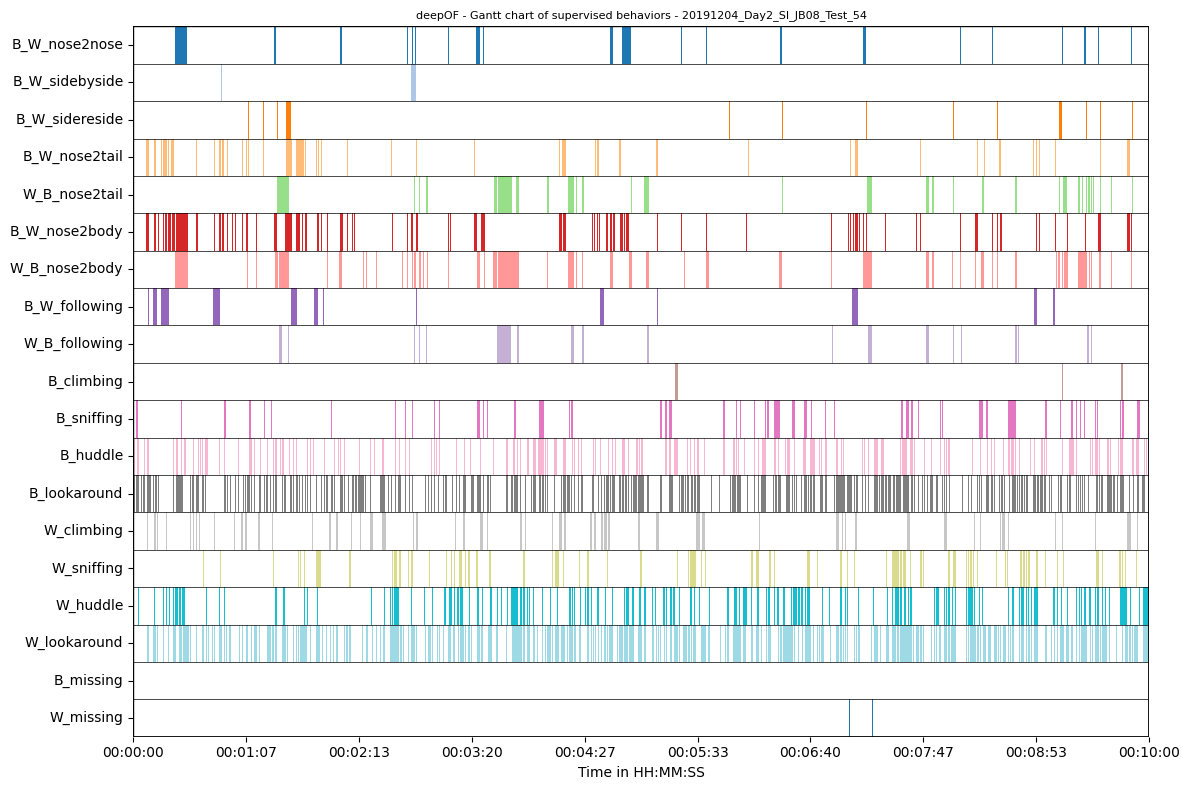

In [8]:
plt.figure(figsize=(12, 8))

deepof.visuals.plot_gantt(
    my_deepof_project,
    "20191204_Day2_SI_JB08_Test_54",
    supervised_annotations=supervised_annotation,
)

plt.show()

We see in these examples neither of the animals are significantly occluded.

Thats good for a quick visualization, but let's indeed compare how these patterns compare across experimental conditions!

### Exploring trait enrichment across conditions.

The simplest (but quite powerful) thing to do is to test for enrichment across traits. We can compute all statistics and plot the results using the `deepof.visuals.plot_enrichment()` function. The code below creates a figure with two plots with different scales (one for speed and one for everything else, given the differences in y-axis values).

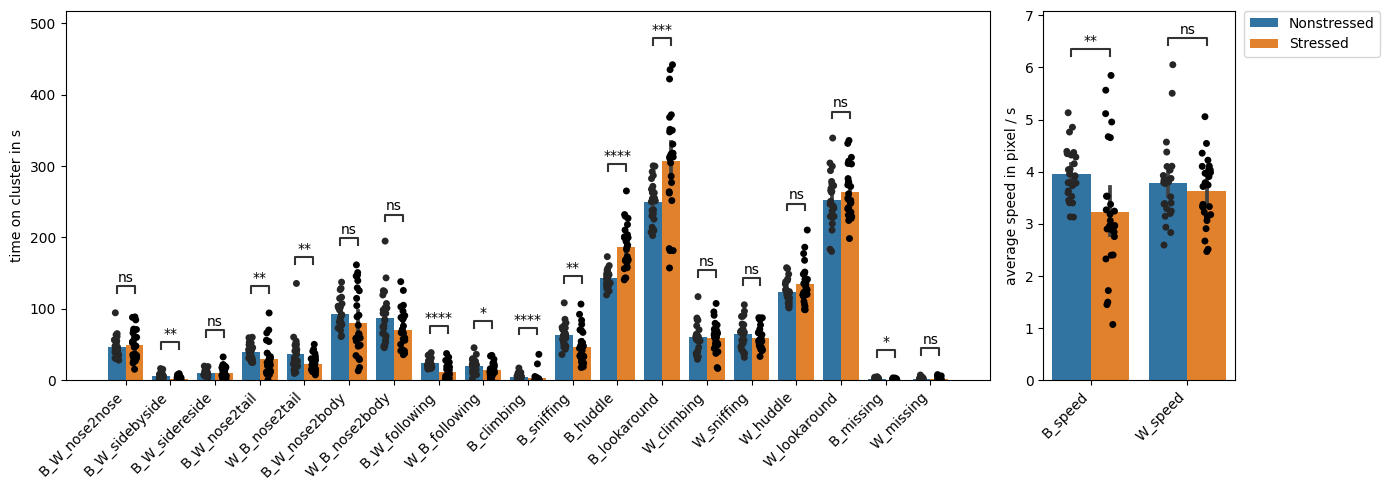

In [9]:
fig = plt.figure(figsize=(14, 5)).subplot_mosaic(
    mosaic="""
           AAAAB
           AAAAB
           """,
)

deepof.visuals.plot_enrichment(
    my_deepof_project,
    supervised_annotations=supervised_annotation,
    add_stats="Mann-Whitney",
    plot_speed=False,
    ax = fig["A"],
)

deepof.visuals.plot_enrichment(
    my_deepof_project,
    supervised_annotations=supervised_annotation,
    add_stats="Mann-Whitney",
    plot_speed=True,
    ax = fig["B"],
)

for ax in fig:
    fig[ax].set_xticklabels(fig[ax].get_xticklabels(), rotation=45, ha='right')
    fig[ax].set_title("")
    fig[ax].set_xlabel("")
    
fig["A"].get_legend().remove()

plt.tight_layout()    
plt.show()

We see DeepOF reports significant differences for many of these traits! If you'd like to print a detailed statistical summary, you can set the 'verbose' parameter to True in `deepof.visuals.plot_enrichment()`.

In the figures, you see all tagged traits in the X-axis, and the frames per video in the y-axis. Bars represent averages, and error bars standard deviations. By default, DeepOF runs a Mann-Whitney U non-parametric test on the means per test, and controls for multiple testing using Benjamini-Hochberg's method. For details on how to change both the tests to run and the multiple testing parameters, feel free to check the full API reference or the function docstring.

Most functions within DeepOF allow the user to restrict the data to certain periods of time. This can be useful to quantify habituation, for example (as we'll see), or to explore how the retrieved patterns interact with timed environmental cues (such as tones, experimental actions, etc.).

To see how this works in the context of supervised annotation enrichment, let's generate the same figure as above, but for the first two minutes of data only:

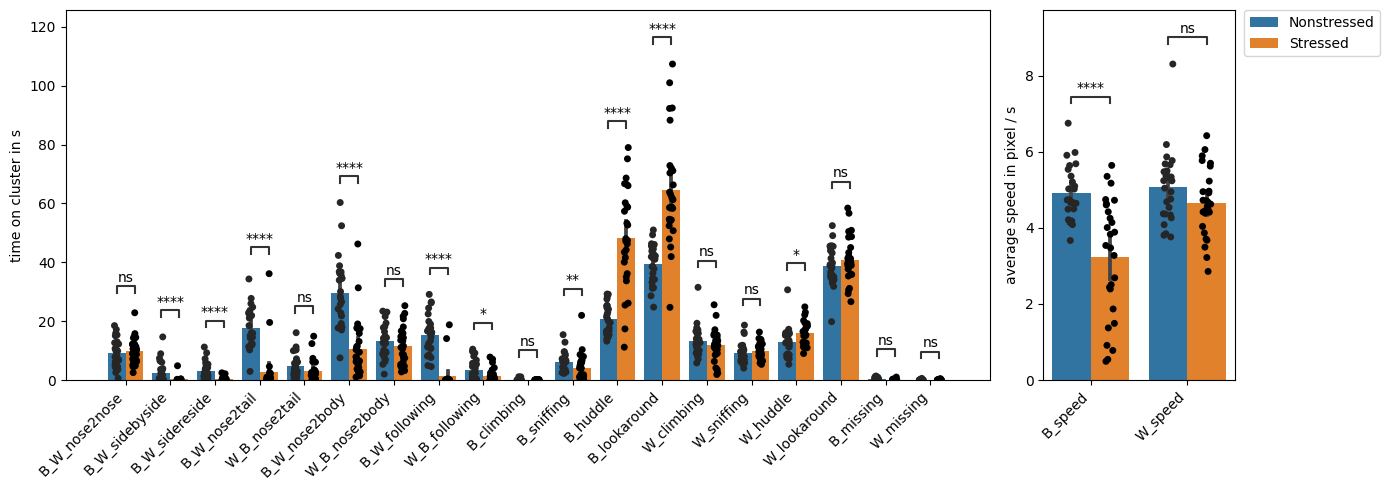

In [10]:
fig = plt.figure(figsize=(14, 5)).subplot_mosaic(
    mosaic="""
           AAAAB
           AAAAB
           """,
)

deepof.visuals.plot_enrichment(
    my_deepof_project,
    supervised_annotations=supervised_annotation,
    add_stats="Mann-Whitney",
    plot_speed=False,
    bin_index=0,
    bin_size=120,
    ax = fig["A"],
)

deepof.visuals.plot_enrichment(
    my_deepof_project,
    supervised_annotations=supervised_annotation,
    add_stats="Mann-Whitney",
    plot_speed=True,
    bin_index=0,
    bin_size=120,
    ax = fig["B"],
)

for ax in fig:
    fig[ax].set_xticklabels(fig[ax].get_xticklabels(), rotation=45, ha='right')
    fig[ax].set_title("")
    fig[ax].set_xlabel("")
    
fig["A"].get_legend().remove()

plt.tight_layout()    
plt.show()

Even though at first glance the figure may look similar, there are some important differences! For starters, the y-axis now shows lower values, since we're only looking at two minutes of data instead of ten. Moreover, the effect sizes in some tagged patterns (such as huddling or speed) are much larger. Some patterns (such as B_W_nose2body) even show high significance where they were barely different across conditions before!

To improve the visibility of differences, we can also plot the same data as a spider chart

<Figure size 1400x500 with 0 Axes>

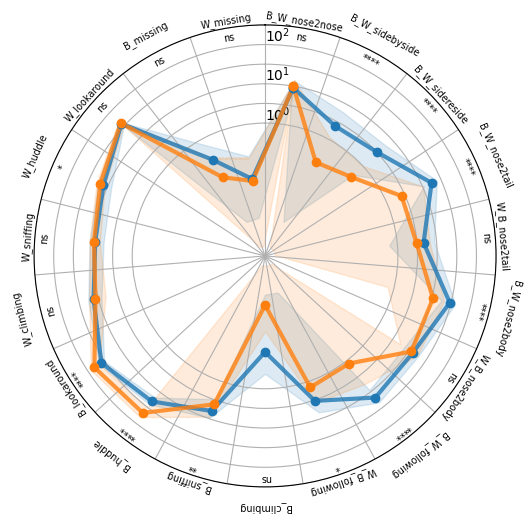

In [11]:
plt.figure(figsize=(14, 5))

deepof.visuals.plot_enrichment(
    my_deepof_project,
    supervised_annotations=supervised_annotation,
    add_stats="Mann-Whitney",
    plot_speed=False,
    bin_index=0,
    bin_size=120,
    polar_depiction=True,
)

plt.show()

One interesting difference between our plots with and without binning is the B_W_nose2body behavior, i.e. when teh black mouse approaches the white one to sniff on it's body. We can already see that the difference in the selected first 120 seconds of data is very significant but it is not significant anymore when looking at teh entire dataset. Respectively it makes sense to see how this behavior changes over time. For this, deepof provides the "plot_behavior_trends" function that allowes to visualize the change of one specific behavior over time for our different groups.

<Figure size 1400x500 with 0 Axes>

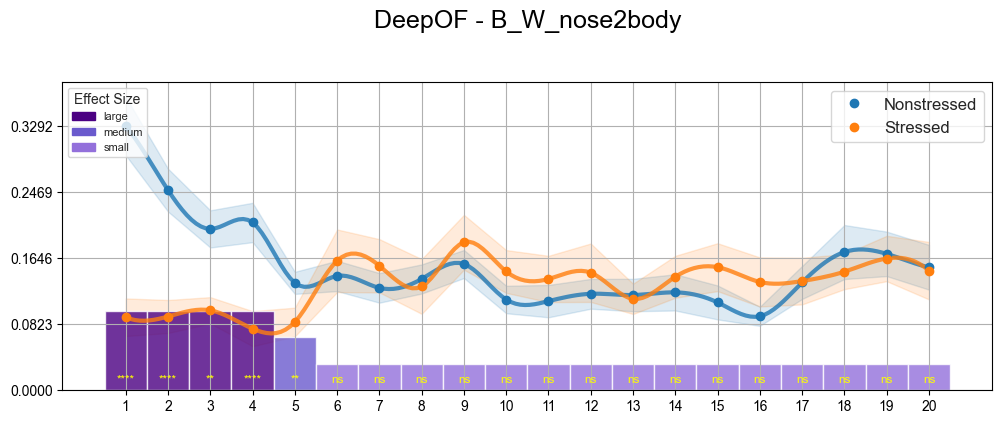

In [12]:
plt.figure(figsize=(14, 5))

deepof.visuals.plot_behavior_trends(
    my_deepof_project,
    supervised_annotations=supervised_annotation,
    polar_depiction = False,
    behavior_to_plot ="B_W_nose2body",
    normalize = True,
    N_time_bins = 20,
)

plt.show()

And indeed, there is a significant time dependent difference between the Stressed and Nonstressed mice. It seems that right after being placed in the arena the Nonstressed black mice tend to approach the white mice more often to "sniff them out". Stressed black mice are more hesitant to approach their white counterpart, which leads to the difference we just visualized.

We seem to already be picking up the habituation of the stressed animals to their novel environment. For more details on this specific effect and the rationale behind how it's quantified, feel free to check out the main DeepOF paper!

But, for now, let's continue with another interesting tool: PCA projections.

### PCA embedding of supervised traits

An often useful way of looking at multivariate data (such as the annotation vectors we just generated) is to project them in the lower-dimensional space. We'll explore more sophisticated ways of doing that in the next tutorial, but for now we can just run these vectors through PCA. DeepOF allows us to do this with the `deepof.visuals.plot_embeddings()` function.

Moreover, we can also restrict the analysis over time. Let's compare, again, the whole data to the first two minutes:

Info! Set aggregate_experiments to -mean- since supervised annotations were given!
Info! Set aggregate_experiments to -mean- since supervised annotations were given!


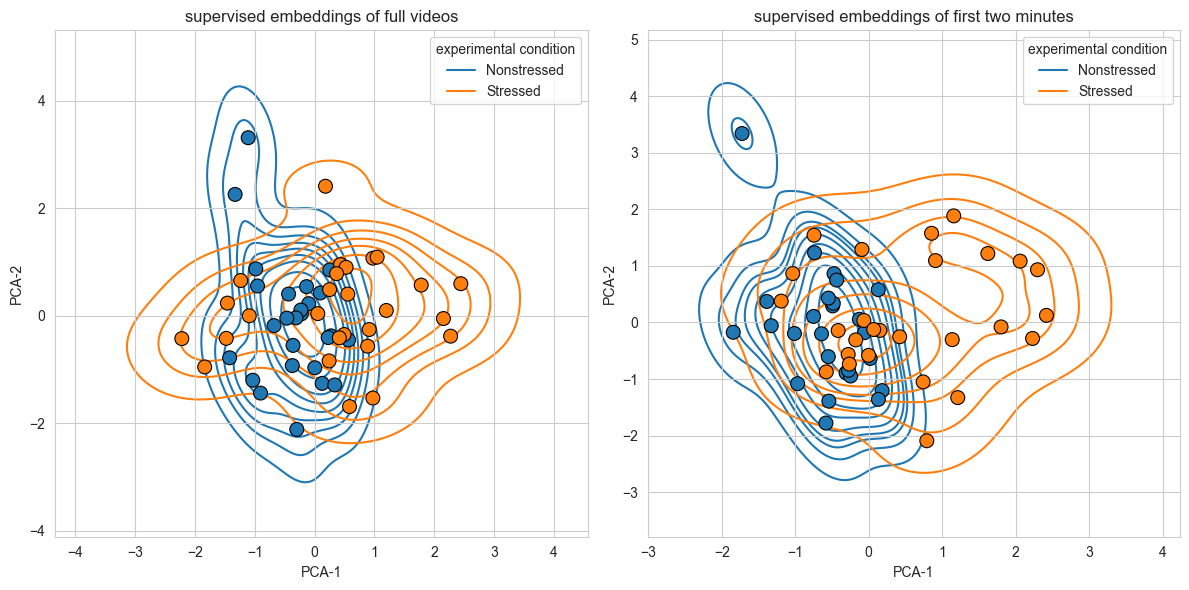

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

deepof.visuals.plot_embeddings(
    my_deepof_project,
    supervised_annotations=supervised_annotation,
    ax=ax1,
)
deepof.visuals.plot_embeddings(
    my_deepof_project,
    supervised_annotations=supervised_annotation,
    bin_size=120,
    bin_index=0,
    ax=ax2,
)

ax1.set_title("supervised embeddings of full videos")
ax2.set_title("supervised embeddings of first two minutes")

plt.tight_layout()
plt.show()

We can see how, indeed, the PCA on the average set of annotators seems to distinguish across conditions better when looking at the first two minutes only. We'll continue to explore this idea in the next (and last) tutorial.

### What's next

That's it for this second tutorial. [Next](https://deepof.readthedocs.io/en/latest/tutorial_notebooks/deepof_unsupervised_tutorial.html) and last for now, we'll explore the main forte of the package: we'll learn to embed our data in a sequence-aware manner, to get behavioral patterns in an unsupervised way using deep clustering (where the "deep" in DeepOF comes from). See you there!